# Statistics (Part II): Comparing means
Solutions to the excercises.

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
from collections import Counter
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

## EXERCISE 1: Comparing layouts

### Experimental setup

*Problem*: Find out which version of a display is better.

*Question*: Do users prefer grid view?

*Null hypothesis*: Users do not prefer grid view.

### Create ratings data

We assume different subject groups for each conditions. Each subject sees one of the layouts and is asked to rate on a 5-point Likert scale how strongly the agree or disagree with the statement:

> Page gives a good overview.
> 
> 1=strongly agree; 2=agree; 3=neutral; 4=disagree; 5=strongly disagree

G_data corresponds to ratings from users that see the grid view. L_data corresponds to ratings from users that see the list view.

In [2]:
G_data = [1, 3, 3, 2, 4, 2, 3, 3, 1, 5, 2, 3, 4, 2, 1, 3, 2, 2, 1, 3,
          2, 3, 4, 2, 1, 3, 2, 2, 1, 3, 1, 3, 3, 2, 4, 2, 3, 3, 1, 5]
L_data = [4, 5, 2, 4, 4, 3, 5, 4, 3, 5, 1, 4, 5, 3, 4, 4, 2, 3, 4, 5,
          1, 4, 5, 3, 4, 4, 2, 3, 4, 5, 4, 5, 2, 4, 4, 3, 5, 4, 3, 5]
print('Grid median:', np.median(G_data))
print('List median:', np.median(L_data))

Grid median: 2.5
List median: 4.0


In [3]:
# Create a dataframe from G_data and L_data
layout_data = pd.DataFrame({'Grid': G_data, 'List': L_data})
layout_data.head()

,Grid,List
0,1,4
1,3,5
2,3,2
3,2,4
4,4,4


### Visualise ratings data

In [4]:
# Convert the dataframe into long format
layout_data_long = pd.melt(layout_data, var_name='Layout', value_name='Rating')
layout_data_long.head()

,Layout,Rating
0,Grid,1
1,Grid,3
2,Grid,3
3,Grid,2
4,Grid,4


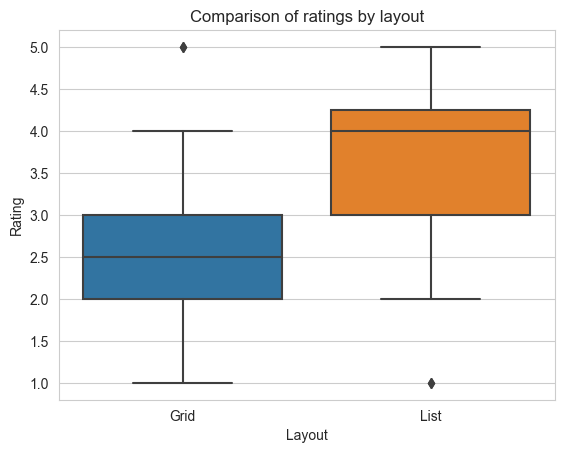

In [5]:
# Create boxplots in Seaborn to compare the ratings of Grid versus List. Use the data in long format.
sns.set_style('whitegrid')
sns.boxplot(x = 'Layout', y = 'Rating', data = layout_data_long)
plt.title('Comparison of ratings by layout')
plt.show()

### TODO Test whether grid is preferred

- Can we reject the null hypothesis at p<0.01 using the Mann-Whitney U test?
- Do users prefer grid view?

In [6]:
# TODO: replace the content of this cell with your Python solution (use the mannwhitneyu method from scipy.stats)
# 1 -
mwu_result = stats.mannwhitneyu(layout_data['Grid'], layout_data['List'])
print('Is there a significant difference?',
      'Yes' if mwu_result.pvalue<0.01 else 'No',
      '(p={:.6f})'.format(mwu_result.pvalue))

# 2 - Users prefer the list layout over the grid layout because the median rating for the grid layout is lower

Is there a significant difference? Yes (p=0.000011)


### TODO p-hacking example

Imagine we instead measured average montly spend. Let's assume a sample of 100 grid users spend \$155 on average with standard deviation 40, and a sample of 100 list users spend \$150 on average with standard deviation 40.

In [7]:
import numpy as np
N = 100
G_mu, G_sigma = 155, 40
L_mu, L_sigma = 150, 40

def run_experiment():
    '''
    Simulate an experiment with N subjects, each of whom spends a random amount of money
    at a store using a grid layout, and a random amount of money at a store using a
    linear layout. The amounts spent are normally distributed with mean and standard
    deviation given by G_mu, G_sigma, L_mu, and L_sigma.

    Returns:
        The p-value of the unpaired t-test hypothesis test.
    '''

    G_spend = np.random.normal(G_mu, G_sigma, N)
    L_spend = np.random.normal(L_mu, L_sigma, N)
    return stats.ttest_ind(G_spend, L_spend).pvalue

In [39]:
# You will get a different p-value each time you run this cell
run_experiment()

0.5479105631999521

- Run 1000 experiments
- For what percentage of experiments do we fail to reject the null hypothesis at 0.05?
- Do your neighbours get the same percentage?

In [40]:
# TODO: replace the content of this cell with your Python solution
# 1 - 
NUM_EXPTS = 1000
pvalues = [run_experiment() for _ in range(NUM_EXPTS)]

# 2 -
ALPHA = 0.05
Rejection_rate = 100 * sum([1 if p>ALPHA else 0 for p in pvalues])/NUM_EXPTS
print(f'We fail to reject H0 {Rejection_rate}% of the time.')

# 3 - You can also run multiple times. The result varies with different samples even though it's generated from the same population!

We fail to reject H0 87.3% of the time.


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE 2: Comparing mobile behaviour

### Experimental setup

Adapted from http://www.beefissuesquarterly.com/beefissuesquarterly.aspx?id=4078.

*Problem*: Find out whether there is a difference in mobile behaviour between generations.

*Question*: Is there any difference between groups?

*Null hypothesis*: Group means are the same.

### Generate generation data

Imagine we conducted a survey of 200 baby boomers (born 1945-1960), 200 generation xers (born 1961-1980) and 200 millennials (born 1981-1995).

For the purposes of this exercise, let's generate some simulated samples. We assume:
- Boomers send 5 texts per day on average with standard deviation 2;
- GenXers send 12 texts per day on average with standard deviation 3;
- Millennials send 20 texts per day on average with standard deviation 5.

We use `numpy.random.normal` to generate random values from a normal distribution with these parameters

In [41]:
N = 200
B_mu, B_sigma = 5, 2
X_mu, X_sigma = 12, 3
M_mu, M_sigma = 20, 5
B_data = [int(round(n)) for n in np.random.normal(B_mu, B_sigma, N)]
X_data = [int(round(n)) for n in np.random.normal(X_mu, X_sigma, N)]
M_data = [int(round(n)) for n in np.random.normal(M_mu, M_sigma, N)]

### Visualise generation data

Let's use the `matplotlib.pyplot.hist` function to plot our visualise our three distributions.

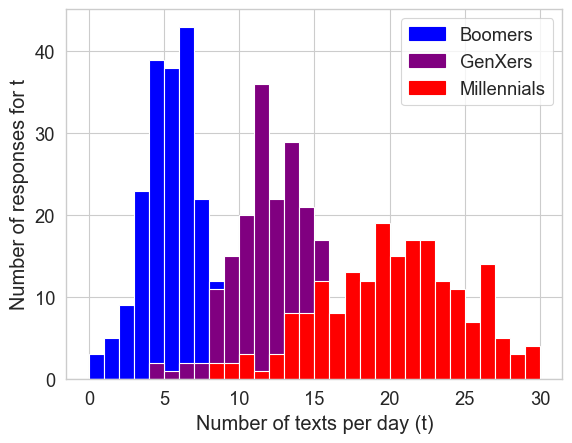

In [43]:
start,end,n_bins = 0,30,30
_,_,_ = plt.hist(B_data, bins=n_bins, range=(start,end), color='blue')
_,_,_ = plt.hist(X_data, bins=n_bins, range=(start,end), color='purple')
_,_,_ = plt.hist(M_data, bins=n_bins, range=(start,end), color='red')
_ = plt.legend(handles=[mpatches.Patch(color='blue', label='Boomers'),
                    mpatches.Patch(color='purple', label='GenXers'),
                    mpatches.Patch(color='red', label='Millennials')])
_ = plt.xlabel('Number of texts per day (t)')
_ = plt.ylabel('Number of responses for t')

### TODO Test for differences

- Use one-way analysis of variance (ANOVA) to test whether the sample means are the same.
- Can we reject the null hypothesis at p<0.01?
- Is there a reliable difference in texting behaviour between generations?

In [44]:
anova_result = stats.f_oneway(B_data, X_data, M_data)
print(bool(anova_result.pvalue < 0.01))

True


### TODO Check ANOVA assumptions

- Does our data meet the assumptions for a one-way ANOVA?
- Can we reject the null hypothesis using the Kruskall-Wallis H-test (use `kruskal` from the `stats` package)?
- Is there a significant difference in texting behaviour between generations?

In [45]:
# TODO: replace the content of this cell with your Python solution
# 1 - Our data sets are independent and normal, however, standard deviations are not equal.

# 2 - 
kw_result = stats.kruskal(B_data, X_data, M_data)
print('Can we reject H0?', 'Yes' if kw_result.pvalue<0.01 else 'No')

# 3 - 
print('Is there a significant difference? Almost certainly..')
print(f'(There is a {kw_result.pvalue*100}% chance of falsely obtaining this result)')

Can we reject H0? Yes
Is there a reliable difference? Almost certainly..
(There is a 4.3008998545885166e-103% chance of falsely obtaining this result)


### TODO Further generation exercises

Imagine we wanted to compare millennials to generation z (born since 1996). Let's assume this population sends 21 texts per day on average with standard deviation 5.

- Generate a simulated sample Z_data.
- What test should we use?
- Is there a reliable difference in texting behaviour between millennials and generation Z?

In [46]:
# TODO: replace the content of this cell with your Python solution
# 1 - 
Z_mu, Z_sigma = 21, 5
Z_data = [int(round(n)) for n in np.random.normal(Z_mu, Z_sigma, N)]

# 2 - Either will work since standard deviations are equal.

# 3 - 
mz_anova_result = stats.f_oneway(M_data, Z_data)
print('Is there a reliable difference?',
      'Yes' if mz_anova_result.pvalue<0.01 else 'No',
      '(p={:.3f})'.format(mz_anova_result.pvalue))

Is there a reliable difference? No (p=0.161)


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE 3: Confidence intervals

[Adapted from Data Science from Scratch pages 183-184 and http://people.duke.edu/~ccc14/pcfb/analysis.html.]

Imagine we want to quantify the variance of the mean score within a sample but we can't or don't want to run our classifier multiple times. We can use bootstrap resampling to do this.

### Generate non-normal data

First let's generate some data according to a beta distribution with a=8 and b=2.

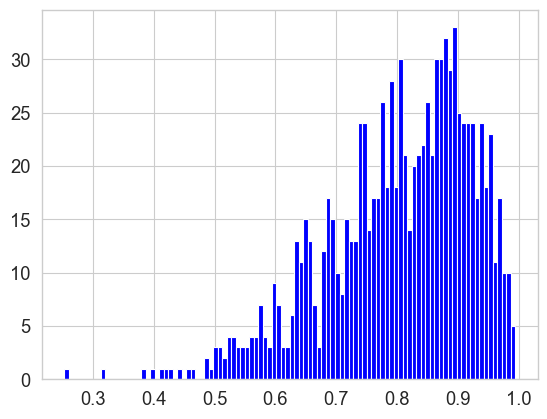

In [47]:
N = 1000
a = 8
b = 2
D = [np.random.beta(a, b) for _ in range(N)]
_, _, _ = plt.hist(D, bins=100, color='blue')

### Bootstrapping a statistic

We define functions to randomly sample elements with replacement and to apply a statistic funcion over these samples many times. 

Note: Please be patient. This might take a little bit of time to run.

In [48]:
S = 100

def bootstrap_sample(data):
    return [np.random.choice(data) for _ in data]

def bootstrap_statistic(data, stats_fn, num_samples):
    return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

bs_mean = bootstrap_statistic(D, np.mean, S)
print(bs_mean[:5])

[0.8031366194259306, 0.8039804085858296, 0.7968812212644752, 0.8010609295139262, 0.8069075778710779]


### Computing the confidence interval

Finally we define a function to compute the confidence interval at a given level. For the `level` parameter, 0.05 corresponds to a 95% confidence interval.

In [49]:
def bootstrap_ci(stats, level):
    lower_percentile = 0.5*level
    upper_percentile = 100 - 0.5*level
    return np.percentile(stats, lower_percentile), np.percentile(stats, upper_percentile)

lb, ub = bootstrap_ci(bs_mean, 0.05)

print('{:.3f} [{:.3f},{:.3f}]'.format(np.mean(D), lb, ub))

0.802 [0.792,0.812]


- Bootstrap median statistic and calculate confidence interval
- Discussion: When are confidence intervals better than standard deviation?
- Discussion: When could we use a bootstrap CI?

In [50]:
# TODO: replace the content of this cell with your Python solution
# 1 - 
bs_median = bootstrap_statistic(D, np.median, S)
print(bs_median[:5])
lb_median, ub_median = bootstrap_ci(bs_median, 0.05)
print('{:.3f} [{:.3f},{:.3f}]'.format(np.median(D), lb_median, ub_median))

# 2 - From Frost. Understanding Hypothesis Tests: Confidence Intervals and Confidence Levels.
#     http://blog.minitab.com/blog/adventures-in-statistics/understanding-hypothesis-tests%3A-confidence-intervals-and-confidence-levels
#     Confidence intervals serve as good estimates of the population parameter because the procedure tends to produce 
#     intervals that contain the parameter. Confidence intervals are comprised of the point estimate (the most likely 
#     value) and a margin of error around that point estimate. The margin of error indicates the amount of uncertainty 
#     that surrounds the sample estimate of the population parameter.
#     In this vein, you can use confidence intervals to assess the precision of the sample estimate. For a specific 
#     variable, a narrower confidence interval [90 110] suggests a more precise estimate of the population parameter 
#     than a wider confidence interval [50 150].

# 3 - The bootstrap is a general, nonparametric procedure for calculating CIs.

[0.83328925588937, 0.827199770187634, 0.8166802084723687, 0.8135079409594655, 0.8212678102053027]
0.822 [0.809,0.833]
